In [5]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Loading dataset
df = pd.read_csv('Rice_Cammeo_Osmancik.csv')

In [7]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [9]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [10]:
df.corr(numeric_only=True)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


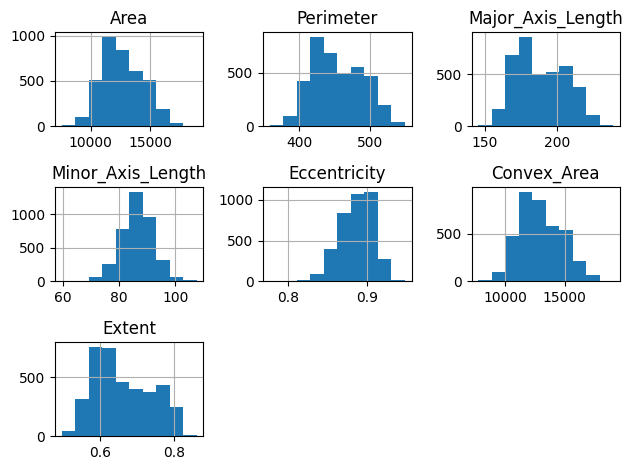

In [11]:
df.iloc[:,:-1].hist()
plt.tight_layout()
plt.show()

In [12]:
pd.set_option('display.float_format', '{:.10f}'.format)
print(df.var(numeric_only=True))

Area                3001097.8690486443
Perimeter              1267.1522072406
Major_Axis_Length       304.4563814573
Minor_Axis_Length        32.8308066769
Eccentricity              0.0004333739
Convex_Area         3157629.6383465971
Extent                    0.0059658281
dtype: float64


In [13]:
# As we can see the high correlation between features with Area so we are dropping some features
df = df.drop(columns=['Perimeter','Major_Axis_Length','Convex_Area'])

In [14]:
df.head()

,Area,Minor_Axis_Length,Eccentricity,Extent,Class
0,15231,85.0937881470,0.9288820028,0.5728955269,Cammeo
1,14656,91.7309722900,0.8954049945,0.6154363155,Cammeo
2,14634,87.7682876587,0.9121180773,0.6932588220,Cammeo
3,13176,87.4483947754,0.8918609023,0.6406690478,Cammeo
4,14688,89.3124542236,0.9066908956,0.6460239291,Cammeo


In [15]:
df['Class'].value_counts()

,count
Class,
Osmancik,2180
Cammeo,1630


In [16]:
# encoding the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df.iloc[:,-1])
y.shape

(3810,)

In [17]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
# Separating the target
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [19]:
print(X.shape)
X_train[:10]

(3810, 4)


array([[1.30780000e+04, 9.16900101e+01, 8.66963208e-01, 7.32743144e-01],
       [1.53810000e+04, 9.33097458e+01, 8.97810400e-01, 7.40325391e-01],
       [1.12800000e+04, 8.54973679e+01, 8.65476072e-01, 6.43174827e-01],
       [1.24080000e+04, 8.30334778e+01, 9.01538372e-01, 5.83905876e-01],
       [1.41310000e+04, 8.82840500e+01, 9.04419601e-01, 7.52930522e-01],
       [1.25730000e+04, 8.97423859e+01, 8.67439926e-01, 6.62923098e-01],
       [1.38700000e+04, 8.85032349e+01, 9.00391757e-01, 7.56517947e-01],
       [8.32800000e+03, 7.05686035e+01, 8.86595726e-01, 5.84421039e-01],
       [1.27450000e+04, 8.76672897e+01, 8.83307338e-01, 6.05175674e-01],
       [1.16750000e+04, 8.68340607e+01, 8.65608990e-01, 7.37337351e-01]])

In [20]:
# Feature Sacling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Training Dataset on Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train,y_train)

LogisticRegression()

In [22]:
# Cross Validation
from sklearn.model_selection import cross_val_score,GridSearchCV
score = cross_val_score(logistic_clf,X_train,y_train,scoring='accuracy',cv=10)
print(f'Score {score.mean()}')
print(f'Score {score.std()}')

Score 0.9284663503019844
Score 0.016707511572936682


In [23]:
#  Training model on Linear SVC
from sklearn.svm import LinearSVC
svc_clf = LinearSVC()
svc_clf.fit(X_train,y_train)

LinearSVC()

In [24]:
# Cross Validation
from sklearn.model_selection import cross_val_score,GridSearchCV
score = cross_val_score(svc_clf,X_train,y_train,scoring='accuracy',cv=10)
print(f'Score {score.mean()}')
print(f'Score {score.std()}')

Score 0.9284663503019844
Score 0.016768772420755817


In [25]:
# Training data on Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
from sklearn.model_selection import cross_val_score,GridSearchCV
score = cross_val_score(tree_clf,X_train,y_train,scoring='accuracy',cv=10)
print(f'Score {score.mean()}')
print(f'Score {score.std()}')

Score 0.8845017256255392
Score 0.019418341902612022


In [27]:
# Grid Search to find hyperparameter
parameter = {
    'penalty' : ['l1','l2','elasticnet'],
    'C' : [1,2,3,4,5],
}
grid_search = GridSearchCV(logistic_clf,param_grid=parameter,cv=10,scoring='accuracy')
grid_search.fit(X_train,y_train)
print(f'Score : {grid_search.best_score_}')
print(f'Best Parameter: {grid_search.best_params_}')

Score : 0.9284663503019844
Best Parameter: {'C': 1, 'penalty': 'l2'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [28]:
# Training on KNN
from sklearn.neighbors import KNeighborsClassifier
neighbors_clf = KNeighborsClassifier()
neighbors_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
from sklearn.model_selection import cross_val_score,GridSearchCV
score = cross_val_score(neighbors_clf,X_train,y_train,scoring='accuracy',cv=10)
print(f'Score {score.mean()}')
print(f'Score {score.std()}')

Score 0.9189570750647109
Score 0.013799964744576215


In [30]:
parameter = {
    'n_neighbors' : list(range(2,10)),
    'weights': ['uniform','distance'],

}
grid_search = GridSearchCV(neighbors_clf,param_grid=parameter,cv=10,scoring='accuracy')
grid_search.fit(X_train,y_train)
print(f'Score : {grid_search.best_score_}')
print(f'Best Parameter: {grid_search.best_params_}')

Score : 0.9228915012942192
Best Parameter: {'n_neighbors': 9, 'weights': 'uniform'}


In [31]:
knn_clf = KNeighborsClassifier(n_neighbors=9)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

As we got high accuracy on logistic Regression. So going to test on testing set

Accuracy Score: 0.9146981627296588


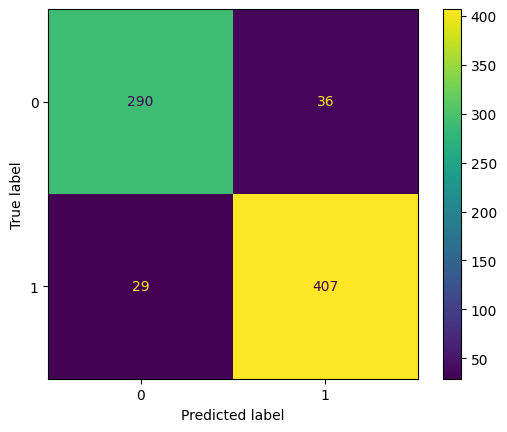

In [32]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
y_pred = logistic_clf.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
ConfusionMatrixDisplay.from_estimator(logistic_clf,X_test,y_test)